In [22]:
#importing all libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load Data
data=pd.read_csv(r"C:\Users\Admin\Downloads\Unemployment in India.csv")
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data preprocessing

In [3]:
data.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [4]:
data.dropna(inplace=True)

In [5]:
data.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [6]:
data.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [7]:
data.shape

(740, 7)

In [9]:
data.duplicated().sum()

0

In [10]:
pd.DataFrame(data.apply(lambda col: len(col.unique())),columns=["Unique Values Count"])

,Unique Values Count
Region,28
Date,14
Frequency,2
Estimated Unemployment Rate (%),624
Estimated Employed,740
Estimated Labour Participation Rate (%),626
Area,2


In [11]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [12]:
data.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban


In [14]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

# Data Analysing

In [20]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),740.0,1.178795e+01,1.072130e+01,0.00,4.657500e+00,8.35,1.588750e+01,76.74
Estimated Employed,740.0,7.204460e+06,8.087988e+06,49420.00,1.190404e+06,4744178.50,1.127549e+07,45777509.00
Estimated Labour Participation Rate (%),740.0,4.263012e+01,8.111094e+00,13.33,3.806250e+01,41.16,4.550500e+01,72.57


In [50]:
#Average employment Rate
fig = px.bar(data, x = "Region", y = " Estimated Unemployment Rate (%)", color = "Region", title = "Average unemployment Rate")
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()                 #highest employement Rate tripura lowest sikkim

In [38]:
#group the data by region 
region_stats = data.groupby(["Region"])[[' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)']].mean().reset_index()
region_stats = round(region_stats, 2)
region_stats

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Andhra Pradesh,7.48,8154093.18,39.38
1,Assam,6.43,5354772.15,44.87
2,Bihar,18.92,12366189.14,38.15
3,Chandigarh,15.99,316831.25,39.34
4,Chhattisgarh,9.24,4303498.57,42.81
5,Delhi,16.50,2627512.86,38.93
6,Goa,9.27,226308.33,39.25
7,Gujarat,6.66,11402012.79,46.10
8,Haryana,26.28,3557072.46,42.74
9,Himachal Pradesh,18.54,1059823.71,44.22


In [34]:
data['Region'] = data['Region'].astype('category')


In [41]:
#heatmap of correlation
heat_map=data[[' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)']].corr()
heat_map

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Estimated Unemployment Rate (%),1.000000,-0.222876,0.002558
Estimated Employed,-0.222876,1.000000,0.011300
Estimated Labour Participation Rate (%),0.002558,0.011300,1.000000


<Axes: >

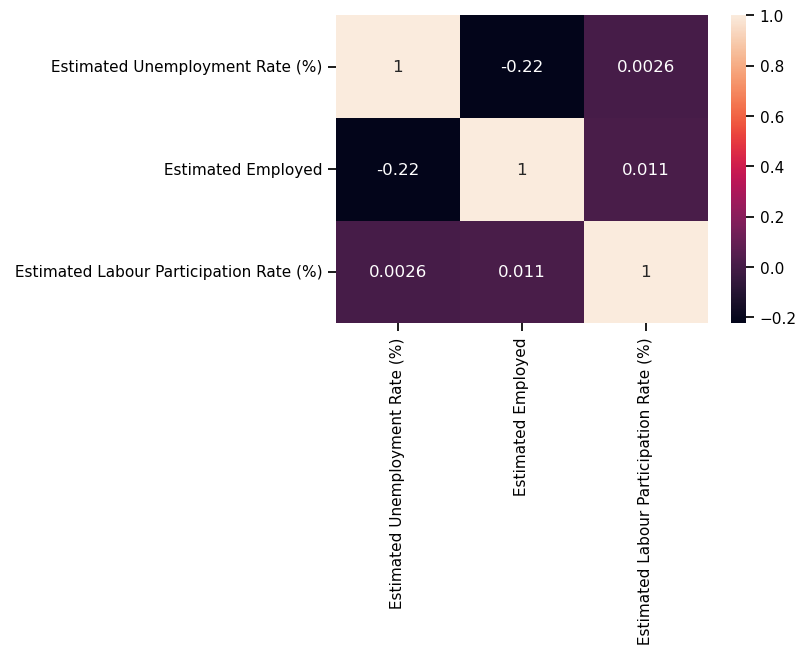

In [49]:
plt.figure(figsize=(6, 4))
sns.set_context('notebook', font_scale=1)
sns.heatmap(heat_map, annot=True)



In [55]:
#people employed in each region
fig = px.bar(data, x = "Region", y = " Estimated Employed", color = "Region", title = "People employed in each region")
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()    

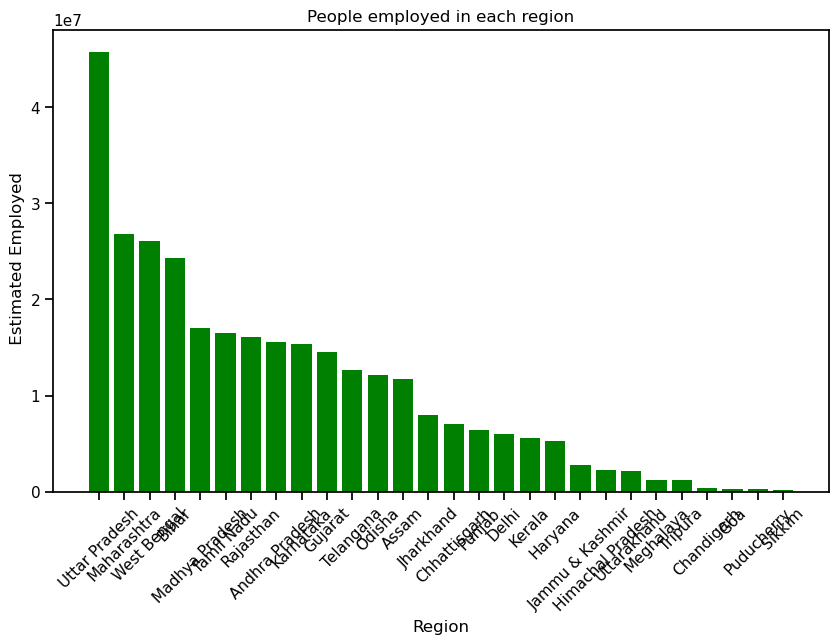

In [54]:
import matplotlib.pyplot as plt

# First, we need to sort the data by 'Estimated Employed' in descending order
data_sorted = data.sort_values(by=' Estimated Employed', ascending=False)

# Then, plot the data
plt.figure(figsize=(10, 6))
plt.bar(data_sorted["Region"], data_sorted[' Estimated Employed'], color='green')  # Adjust color as needed
plt.title("People employed in each region")
plt.xlabel("Region")
plt.ylabel(' Estimated Employed')
plt.xticks(rotation=45)
plt.show()


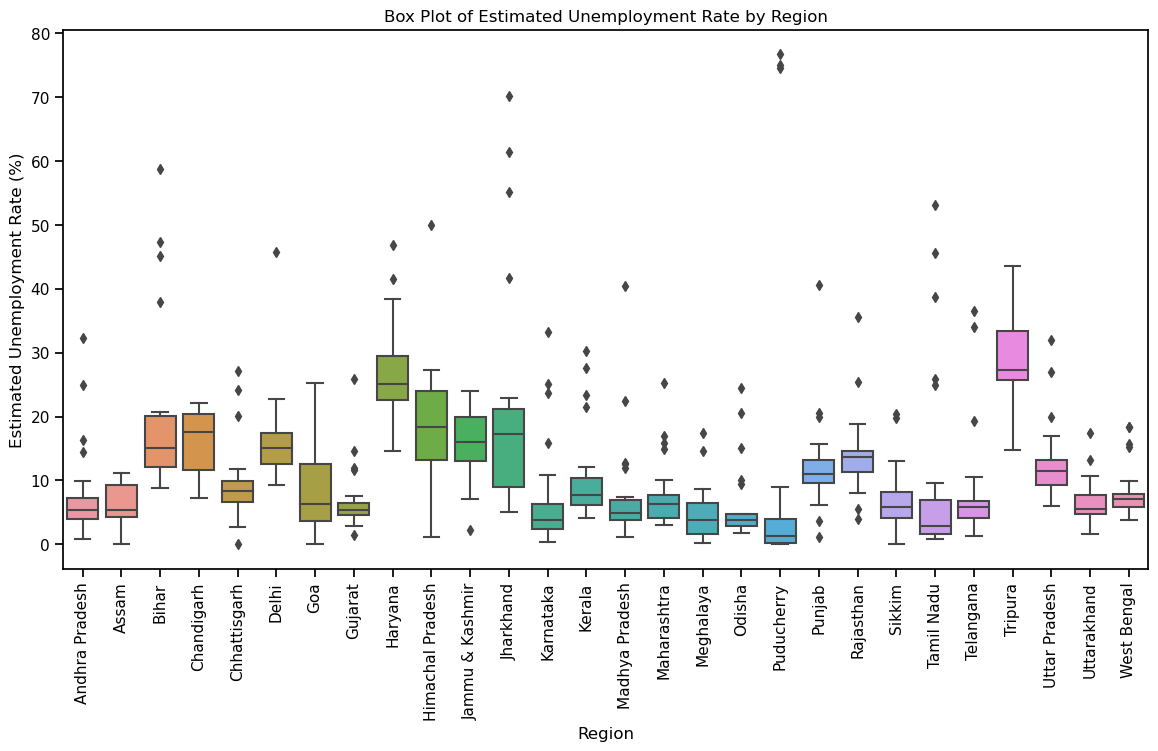

In [57]:
#boxplot for Estimated unemployment by Region

plt.figure(figsize=(14, 7))
# Create the box plot with separate colors for each region
sns.boxplot(x='Region', y=' Estimated Unemployment Rate (%)', data=data)
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Add title and axis labels
plt.title('Box Plot of Estimated Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')

# Show the plot
plt.show()


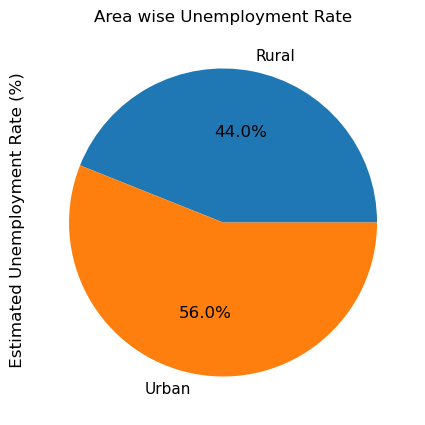

In [59]:
# area wise unemployment rate using pie chart
plt.figure(figsize=(10,5))
data.groupby('Area')[' Estimated Unemployment Rate (%)'].mean().plot(kind='pie', autopct='%1.1f%%')
plt.title('Area wise Unemployment Rate')
plt.show()     #urban area as the highest unemployment rate

In [63]:
# Create an animated bar chart of unemployment rates by region and month

fig = px.bar(data, x='Region', y=' Estimated Labour Participation Rate (%)', animation_frame=' Date', color='Region',
             title='Unemployment rate across region from Jan.2020 to Oct.2020', height=700, template='plotly')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()

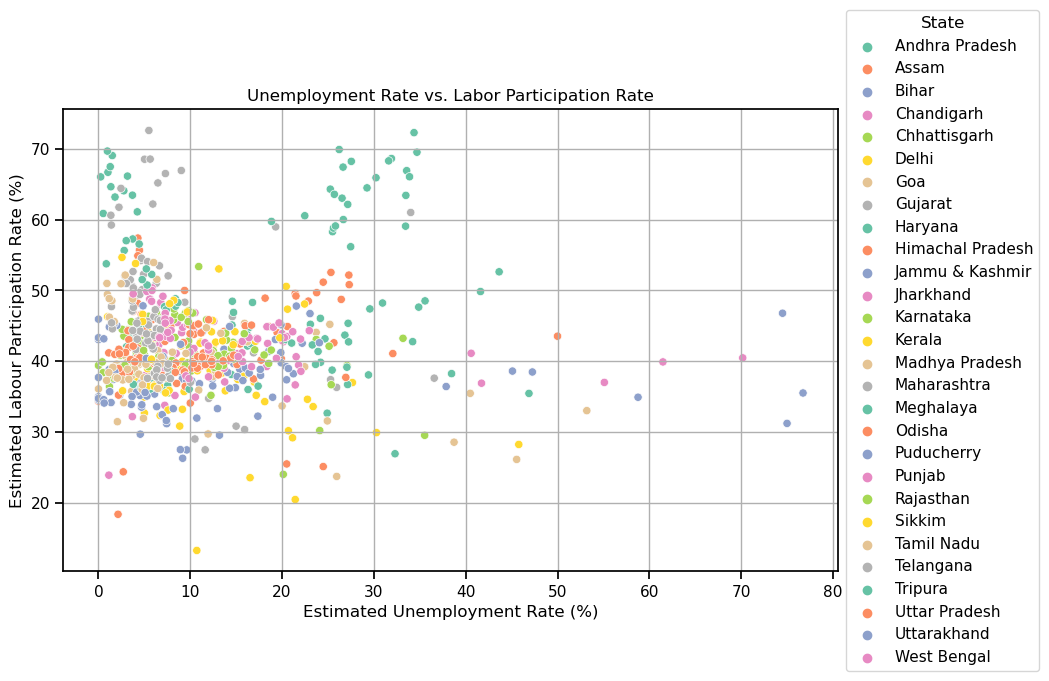

In [67]:
sns.set_palette("Set2")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=' Estimated Unemployment Rate (%)', y=' Estimated Labour Participation Rate (%)', data=data, hue='Region', palette='Set2', legend='full')
plt.title('Unemployment Rate vs. Labor Participation Rate')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.legend(title='State', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.show()

In [73]:
# Drop the  columns
data_numeric = data.drop(columns=['Region',' Frequency','Area'])

# Group by date and calculate the mean of all numeric columns
data_numeric_avg = data_numeric.groupby(' Date').mean()
data_numeric_avg

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Date,,,
29-02-2020,9.964717,7.603996e+06,43.723019
30-04-2020,23.641569,5.283320e+06,35.141176
30-06-2019,9.303333,7.358642e+06,43.750556
30-06-2020,11.903600,7.387009e+06,40.548400
30-09-2019,9.051731,7.739464e+06,44.301346
30-11-2019,9.868364,7.273661e+06,44.110545
31-01-2020,9.950755,7.677344e+06,44.051321
31-03-2020,10.700577,7.516581e+06,43.084038
31-05-2019,8.874259,7.410148e+06,43.902963


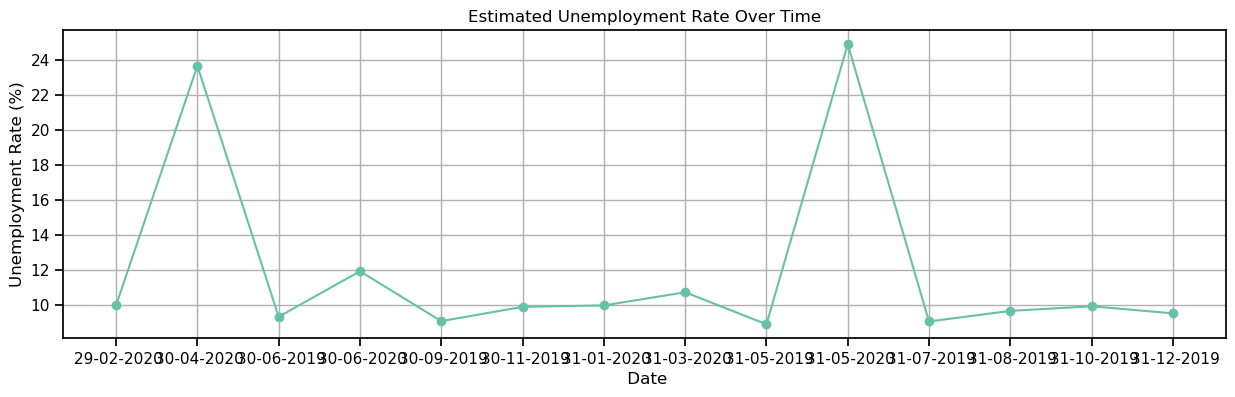

In [82]:
# Plot Estimated Unemployment Rate over time
plt.figure(figsize=(15, 4))
plt.plot(data_numeric_avg.index, data_numeric_avg[' Estimated Unemployment Rate (%)'], marker='o', linestyle='-')
plt.title('Estimated Unemployment Rate Over Time')
plt.xlabel(' Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()